In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm
from tabulate import tabulate
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# 1. Tauchen

# Parameters
n = 9                                                  # Number of grid points (given in the exercise)
m = 3                                                  # Scaling parameter (number of deviations covered)
rho = 0.95                                             # Persistence parameter (given in the exercise)
sigma = 0.007                                          # Standard deviation of epsilon (given in te exercise)

# Standard deviation of z
stdZ = sigma/np.sqrt((1-rho**2))

# Lower and upper bounds of the grid
lb = -m*stdZ                                           # Lower bound
ub = m*stdZ                                            # Upper bound

# Defining the n-1 possible states
Z = np.linspace(lb,ub,n)

# Transition matrix
z = (ub-lb)/(n-1)                                      # Width between gridpoints 
P = np.zeros((n, n))                                   # The matrix

# Loop for inserting values in P[i,j]
for i in range(n):    
    for j in range(n):

        up = (Z[j]-rho*Z[i]+z/2)/sigma            
        down = (Z[j]-rho*Z[i]-z/2)/sigma          

        if j==0:
            P[i,j] = norm.cdf(up)
        elif j==(n-1):                             
            P[i,j] = 1-norm.cdf(down)
        else:
            P[i,j] = norm.cdf(up)-norm.cdf(down)

In [3]:
# Printing:
print("\n Transition Matrix:\n")
print(tabulate(P))
print("\n")

# Check if rows sum to 1
for i in range(n):
    print ("Sum of row {0:}: {1:.6f} ".format(i+1,sum(P[i,])))
    
# The state space
print("\n")
print("\n State Space:\n")
print("\n".join("{}: {:.6f}".format(*i) for i in enumerate(Z)))

# Define the names for the Tauchen transition matrix and state space
PTauchen = P
ZTauchen = Z


 Transition Matrix:

-----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------
0.764415     0.234688     0.000896597  1.65287e-08  1.11022e-15  0            0            0            0
0.0592324    0.740502     0.199673     0.000592224  8.28226e-09  4.44089e-16  0            0            0
6.0751e-05   0.0747099    0.756895     0.167948     0.000385929  4.09226e-09  1.11022e-16  0            0
4.53698e-10  9.84423e-05  0.0931427    0.76688      0.13963      0.000248109  1.99377e-09  1.11022e-16  0
2.10804e-17  9.57805e-10  0.000157352  0.114726     0.770234     0.114726     0.000157352  9.57805e-10  0
5.7576e-27   5.82502e-17  1.99377e-09  0.000248109  0.13963      0.76688      0.0931427    9.84423e-05  4.53698e-10
9.0067e-39   2.08649e-26  1.58686e-16  4.09226e-09  0.000385929  0.167948     0.756895     0.0747099    6.0751e-05
7.9581e-53   4.28473e-38  7.45388e-26  4.26187e-16  8.28226e-09  0.000592224  0.199673     0.740502  

In [4]:
# 2. Rouwenhorst

# Standard deviation of z
stdZ = sigma/np.sqrt((1-rho**2))

# Value of p
p = (1+rho)/2

# Lower and upper bounds of the grid
lb = -np.sqrt(n-1)*stdZ                                # Lower bound
ub = np.sqrt(n-1)*stdZ                                 # Upper bound

# Defining the n-1 possible states
Z = np.linspace(lb,ub,n)

# Defining the recursion function for calculating P
def recursion(m):
    
    if m == 2:
        # Defining P_2
        P = np.array([[p, 1 - p], [1 - p, p]])

    else:
        # Creating the 4 matrices that appear in the sum of Rouwenhorst's Step 2
        p1 = np.zeros((m,m))
        p2 = np.zeros((m,m))
        p3 = np.zeros((m,m))
        p4 = np.zeros((m,m))

        # Calculate the matrix of the previous iteration (P_[n-1])
        prev = recursion(m-1)

        # Build up the 4 matrices
        p1[:m-1,:m-1] = p*prev
        p2[:m-1,1:] = (1-p)*prev
        p3[1:,:-1] = (1-p)*prev
        p4[1:,1:] = p*prev
        
        # Find the current matrix (P_n)
        P = p1 + p2 + p3 + p4
        
        # Dividing all but the top and bottom rows, so that the conditional probabilities add up to 1
        P[1:m-1,] = P[1:m-1,]/2

    return P

P = recursion(n)

In [5]:
# Printing:
print("\n Transition Matrix:\n")
print(tabulate(P))
print("\n")

# Check if rows sum to 1
for i in range(n):
    print ("Sum of row {0:}: {1:.6f} ".format(i+1,sum(P[i,])))
    
# The state space
print("\n")
print("\n State Space:\n")
print("\n".join("{}: {:.6f}".format(*i) for i in enumerate(Z)))

# Define the names for the Rouwenhorst transition matrix and state space
PRouwen = P
ZRouwen = Z


 Transition Matrix:

-----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------
0.816652     0.167518     0.0150337    0.000770959  2.47102e-05  5.06876e-07  6.49841e-09  4.76074e-11  1.52588e-13
0.0209398    0.82041      0.146868     0.0112876    0.000482166  1.236e-05    1.9012e-07   1.62476e-09  5.95093e-12
0.000536918  0.0419622    0.8231       0.126052     0.00806789   0.000275614  5.29783e-06  5.43201e-08  2.32086e-10
1.37671e-05  0.00161252   0.063026     0.824716     0.105112     0.00537977   0.000137807  1.76571e-06  9.05136e-09
3.53003e-07  5.51047e-05  0.00322716   0.0840898    0.825255     0.0840898    0.00322716   5.51047e-05  3.53003e-07
9.05136e-09  1.76571e-06  0.000137807  0.00537977   0.105112     0.824716     0.063026     0.00161252   1.37671e-05
2.32086e-10  5.43201e-08  5.29783e-06  0.000275614  0.00806789   0.126052     0.8231       0.0419622    0.000536918
5.95093e-12  1.62476e-09  1.9012e-07   1.236e-05  

In [6]:
# 3. Simulate the processes

# Function for finding the next realization of a discrete process, given the transition matrix, the current state and a random draw
def nextZ(P,state,draw):      
 
    for j in range(len(P[state,])):                                 # Loop through every possible new state

        lb = norm.ppf(max(min(sum(P[state,:j]),1),0),scale=sigma)   # Lower bound for the draw to represent a transition to state j
        ub = norm.ppf(max(min(sum(P[state,:j+1]),1),0),scale=sigma) # Upper bound for the draw to represent a transition to state j
                
        if lb <= draw < ub:                                         # Check if the draw is in the interval corresponding to the conditional probability of state j
            return j                                                # If it is, then j is the new state
        
# Initial state for the discrete processes
initState = int((n-1)/2)                                            # The process starts at z_0 = 0

# Number of periods
t = 10000

# Define the array for the simulations
zTauchen = np.zeros(t)
zRouwen = np.zeros(t)
zContinuous = np.zeros(t)

# Loop
for i in range(t):
    draw = np.random.normal(0,sigma)                                # Random draw from standard normal distribution
    
    if i == 0:
        sTauchen = initState                                        # Starts at zero
        sRouwen = initState                                         # Starts at zero                 
        zContinuous[i] = 0                                          # Starts at zero
    else:
        sTauchen = nextZ(PTauchen,sTauchen,draw)                    # Next state for the Tauchen process
        sRouwen = nextZ(PRouwen,sRouwen,draw)                       # Next state for the Rouwenhorst process                 
        zContinuous[i] = rho*zContinuous[i-1] + draw                # Next value for the continuous process (from the initial value)
        
    zTauchen[i] = ZTauchen[sTauchen]
    zRouwen[i] = ZRouwen[sRouwen]   
    

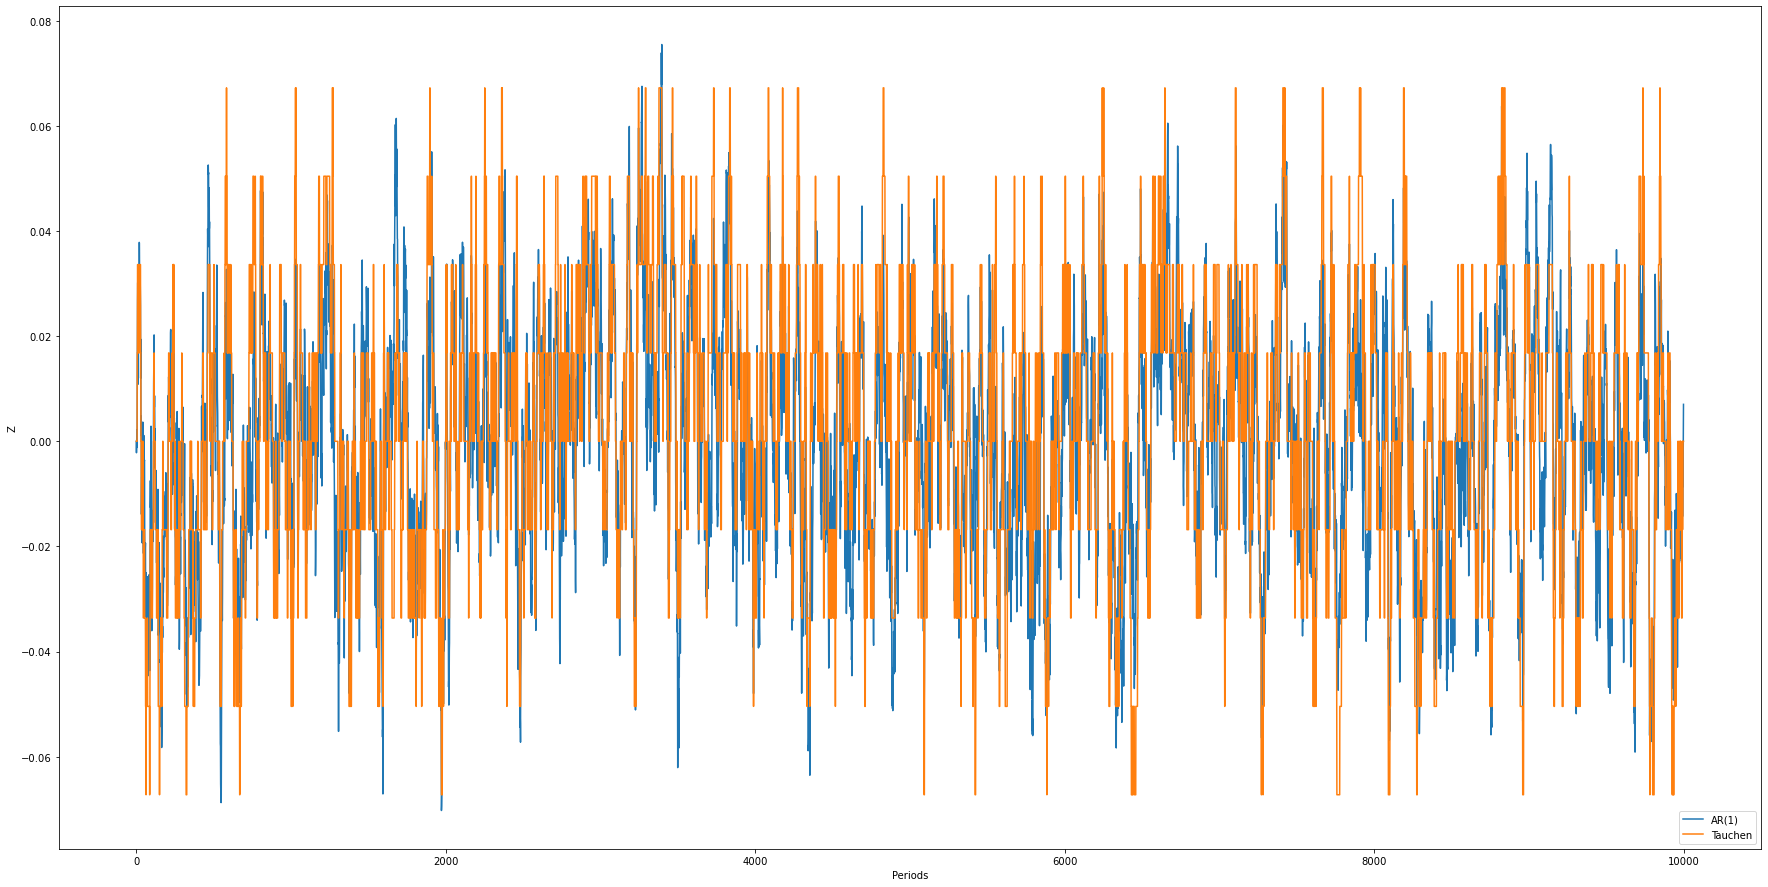

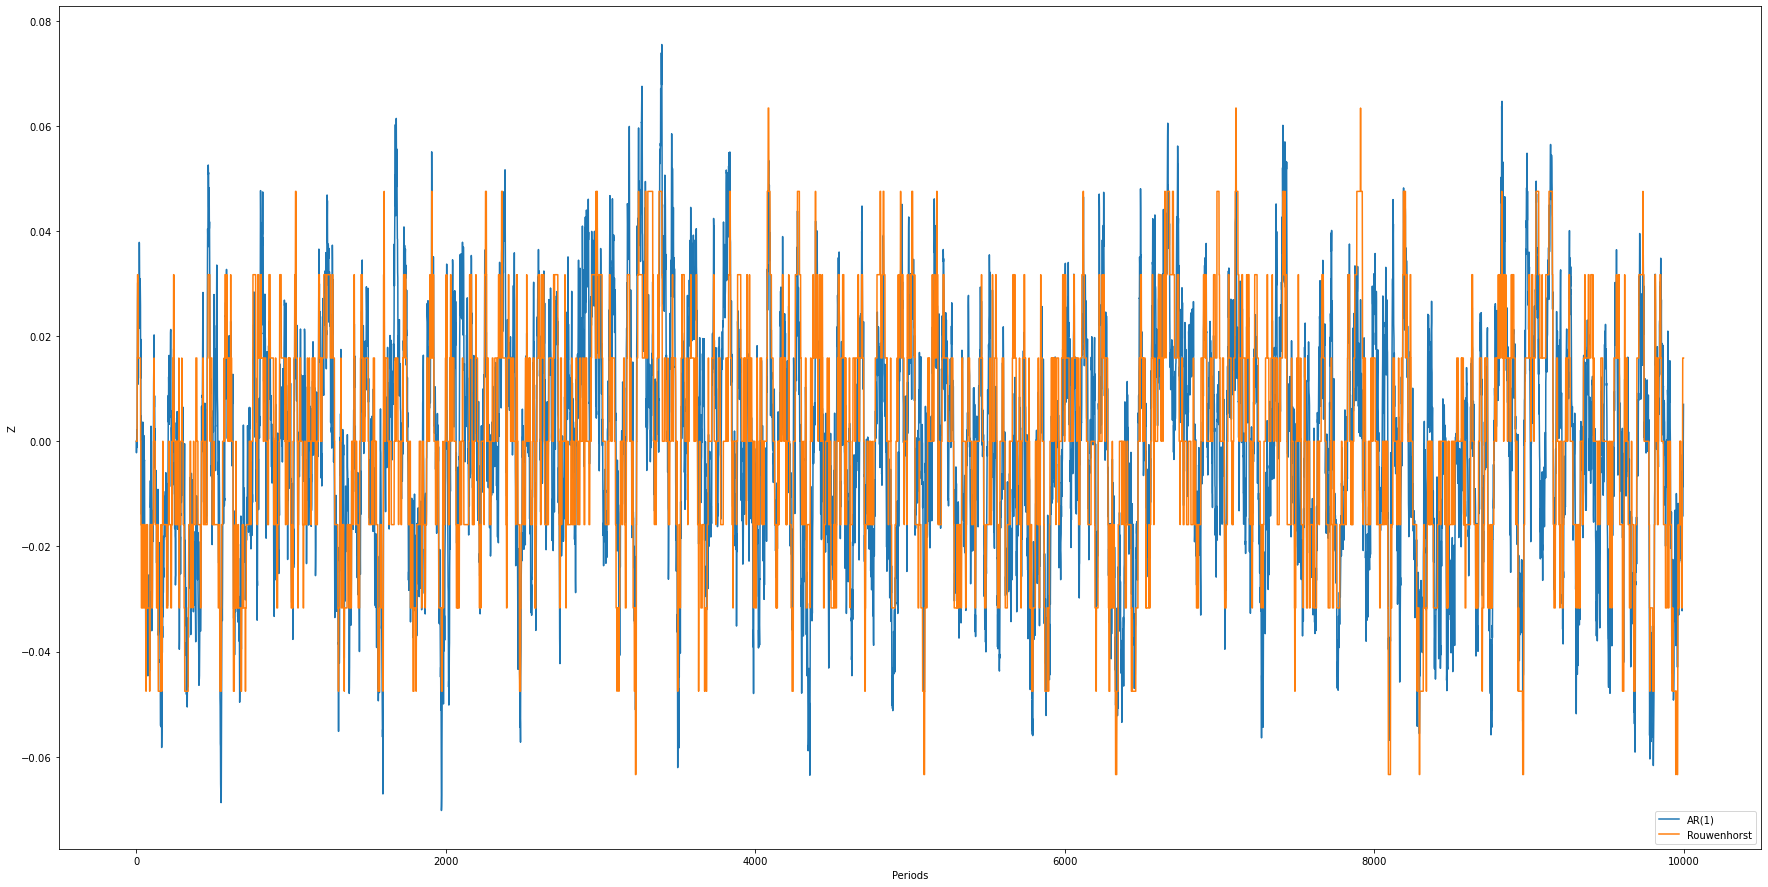

In [7]:
# Plotting the processes together

# Tauchen
fig = plt.gcf()
fig.set_size_inches(30.5, 15.5)
plt.plot(range(t),zContinuous,label="AR(1)")
plt.plot(range(t),zTauchen,label="Tauchen")
plt.legend(loc='lower right')
plt.xlabel('Periods')
plt.ylabel('Z')
plt.show()

# Rouwenhorst
fig = plt.gcf()
fig.set_size_inches(30.5, 15.5)
plt.plot(range(t),zContinuous,label="AR(1)")
plt.plot(range(t),zRouwen,label="Rouwenhorst")
plt.legend(loc='lower right')
plt.xlabel('Periods')
plt.ylabel('Z')
plt.show()

In [8]:
# 4. Estimate the AR(1) parameter rho based on simulated data

rhoHatCont = ARIMA(zContinuous,order=(1,0,0)).fit().params[1]
rhoHatTauchen = ARIMA(zTauchen,order=(1,0,0)).fit().params[1]
rhoHatRouwen = ARIMA(zRouwen,order=(1,0,0)).fit().params[1]

print(rhoHatCont, rhoHatTauchen, rhoHatRouwen)


0.9482647542885462 0.951621840697974 0.9488037491455935
